In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
class_name = "Occupancy"
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


# Data Partitioning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

### Parameters

hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
Activation function for the hidden layer.
* 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
* 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
* 'relu', the rectified linear unit function, returns f(x) = max(0, x)

solver {'lbfgs', 'sgd', 'adam'}, default='adam'
The solver for weight optimization.
* 'lbfgs' is an optimizer in the family of quasi-Newton methods.
* 'sgd' refers to stochastic gradient descent.
* 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
The default solver 'adam' works pretty well on relatively large datasets (>= 1000 training samples) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

alpha float, default=0.0001
L2 penalty (regularization term) parameter.

batch_size int, default='auto'
Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate {'constant', 'invscaling', 'adaptive'}, default='constant'
Learning rate schedule for weight updates.
*'constant' is a constant learning rate given by 'learning_rate_init'.
*'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of *'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)
*'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.
Only used when solver='sgd'.

learning_rate_init double, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

power_t double, default=0.5
The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to 'invscaling'. Only used when solver='sgd'.

max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle bool, default=True
Whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam'.

random_state int, RandomState instance or None, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

tol float, default=1e-4
Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

verbose bool, default=False
Whether to print progress messages to stdout.

warm_start bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

momentum float, default=0.9
Momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd'.

early_stopping bool, default=False
Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'

validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

beta_1 float, default=0.9
Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam'

beta_2 float, default=0.999
Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam'

epsilon float, default=1e-8
Value for numerical stability in adam. Only used when solver='adam'

n_iter_no_change int, default=10
Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'


### Attributes
loss_ float
The current loss computed with the loss function.

coefs_ list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_ list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_ int,
The number of iterations the solver has ran.

n_layers_ int
Number of layers.

n_outputs_ int
Number of outputs.

out_activation_ string
Name of the output activation function.

In [8]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9918133442488744
F1-score [0.99478895 0.98091603]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.97      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



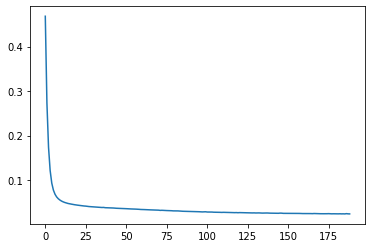

In [9]:
plt.plot(clf.loss_curve_)
plt.show()

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9909946786737618
F1-score [0.99425587 0.97916667]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



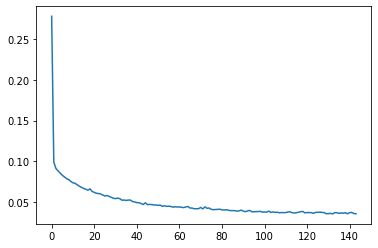

In [11]:
plt.plot(clf.loss_curve_)
plt.show()

In [12]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum", "adam"]

In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning

constant learning-rate
training set score and loss: 0.989, 0.026215


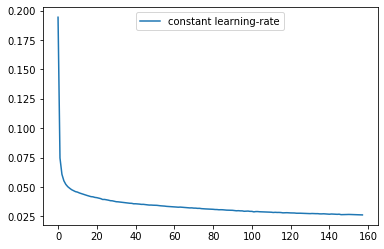

constant with momentum
training set score and loss: 0.991, 0.025384


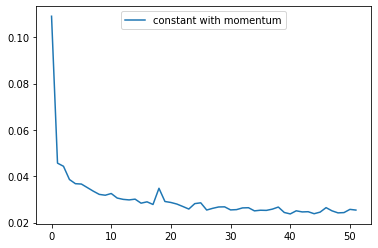

inv-scaling learning-rate
training set score and loss: 0.987, 0.084004


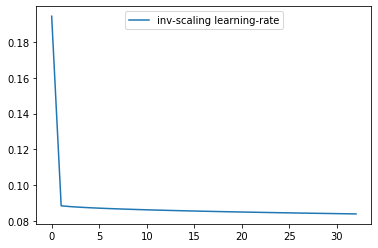

inv-scaling with momentum
training set score and loss: 0.986, 0.045019


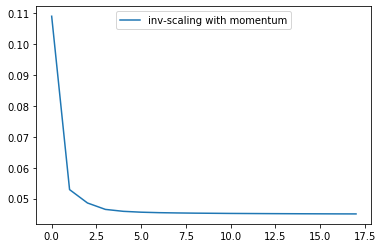

adam
training set score and loss: 0.991, 0.026063


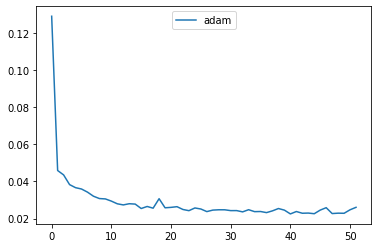

In [14]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=200, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X, y)

    print("training set score and loss: %.3f, %f" % (clf.score(X, y), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

# Keras Deep Neural Networks

In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/piyush2017/opt/anacond

In [16]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=10).history

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
5700/5700 [==============================] - 2s 276us/step - loss: 0.0691 - accuracy: 0.9860
Epoch 2/50
5700/5700 [==============================] - 1s 221us/step - loss: 0.0382 - accuracy: 0.9881
Epoch 3/50
5700/5700 [==============================] - 1s 217us/step - loss: 0.0365 - accuracy: 0.98750s - loss:
Epoch 4/50
5700/5700 [==============================] - 1s 240us/step - loss: 0.0337 - accuracy: 0.9874
Epoch 5/50
5700/5700 [==============================] - 1s 242us/step - loss: 0.0311 - accuracy: 0.9891
Epoch 6/50
5700/5700 [==============================] - 1s 225us/step - loss: 0.0295 - accuracy: 0.99000s - loss: 0.0301 - accuracy
Epoch 7/50
5700/5700 [==============================] - 1s 226us/step - loss: 0.0282 - accuracy: 0.9912
Epoch 8/50
5700/5700 [==============================] - 1s 248us/step - loss: 0.0286 - accuracy: 0.9918
Epoch 9/50

In [18]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=50).history

Epoch 1/50
5700/5700 [==============================] - 1s 89us/step - loss: 0.1731 - accuracy: 0.9681
Epoch 2/50
5700/5700 [==============================] - 0s 44us/step - loss: 0.0462 - accuracy: 0.9881
Epoch 3/50
5700/5700 [==============================] - 0s 44us/step - loss: 0.0412 - accuracy: 0.9870
Epoch 4/50
5700/5700 [==============================] - 0s 44us/step - loss: 0.0393 - accuracy: 0.9865
Epoch 5/50
5700/5700 [==============================] - 0s 44us/step - loss: 0.0368 - accuracy: 0.9867
Epoch 6/50
5700/5700 [==============================] - 0s 48us/step - loss: 0.0365 - accuracy: 0.9870
Epoch 7/50
5700/5700 [==============================] - 0s 43us/step - loss: 0.0355 - accuracy: 0.9870
Epoch 8/50
5700/5700 [==============================] - 0s 43us/step - loss: 0.0334 - accuracy: 0.9868
Epoch 9/50
5700/5700 [==============================] - 0s 43us/step - loss: 0.0323 - accuracy: 0.9865
Epoch 10/50
5700/5700 [==============================] - 0s 44us/step - l

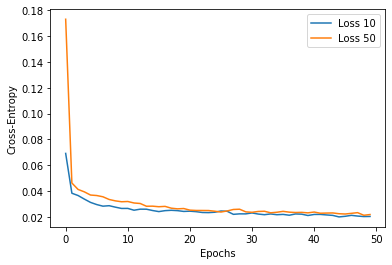

In [19]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [20]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

2443/2443 [==============================] - 0s 45us/step
Loss 0.027835, Accuracy 0.990585
Loss 0.022286, Accuracy 0.992223


In [21]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.787556283258289
F1-score [0.88115411 0.        ]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1924
           1       0.00      0.00      0.00       519

    accuracy                           0.79      2443
   macro avg       0.39      0.50      0.44      2443
weighted avg       0.62      0.79      0.69      2443



/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10).history

Train on 5700 samples, validate on 2443 samples
Epoch 1/1000
5700/5700 [==============================] - 2s 289us/step - loss: 0.0793 - accuracy: 0.9772 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 2/1000
5700/5700 [==============================] - 1s 237us/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0332 - val_accuracy: 0.9906
Epoch 3/1000
5700/5700 [==============================] - 1s 239us/step - loss: 0.0366 - accuracy: 0.9870 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 4/1000
5700/5700 [==============================] - 1s 236us/step - loss: 0.0326 - accuracy: 0.9877 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 5/1000
5700/5700 [==============================] - 1s 232us/step - loss: 0.0322 - accuracy: 0.9888 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 6/1000
5700/5700 [==============================] - 1s 257us/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 7/1000
5700/5700 [==============================] - 1s 234

Epoch 56/1000
5700/5700 [==============================] - 1s 254us/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0234 - val_accuracy: 0.9930
Epoch 57/1000
5700/5700 [==============================] - 1s 234us/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0214 - val_accuracy: 0.9922
Epoch 58/1000
5700/5700 [==============================] - 1s 235us/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0279 - val_accuracy: 0.9922
Epoch 59/1000
5700/5700 [==============================] - 1s 231us/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0230 - val_accuracy: 0.9922
Epoch 60/1000
5700/5700 [==============================] - 1s 228us/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0226 - val_accuracy: 0.9910
Epoch 61/1000
5700/5700 [==============================] - 1s 233us/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.0249 - val_accuracy: 0.9914
Epoch 62/1000
5700/5700 [==============================] - 1s 229us/step - loss: 0.0200 - accuracy: 0.9935

Epoch 111/1000
5700/5700 [==============================] - 1s 229us/step - loss: 0.0185 - accuracy: 0.9932 - val_loss: 0.0234 - val_accuracy: 0.9918
Epoch 112/1000
5700/5700 [==============================] - 1s 239us/step - loss: 0.0168 - accuracy: 0.9940 - val_loss: 0.0255 - val_accuracy: 0.9926
Epoch 113/1000
5700/5700 [==============================] - 1s 230us/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0251 - val_accuracy: 0.9918
Epoch 114/1000
5700/5700 [==============================] - 1s 245us/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.0232 - val_accuracy: 0.9914
Epoch 115/1000
5700/5700 [==============================] - 1s 243us/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0246 - val_accuracy: 0.9926
Epoch 116/1000
5700/5700 [==============================] - 1s 234us/step - loss: 0.0169 - accuracy: 0.9935 - val_loss: 0.0273 - val_accuracy: 0.9906
Epoch 117/1000
5700/5700 [==============================] - 2s 373us/step - loss: 0.0178 - accuracy:

5700/5700 [==============================] - 1s 208us/step - loss: 0.0154 - accuracy: 0.9946 - val_loss: 0.0246 - val_accuracy: 0.9918
Epoch 166/1000
5700/5700 [==============================] - 1s 204us/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0268 - val_accuracy: 0.9922
Epoch 167/1000
5700/5700 [==============================] - 1s 213us/step - loss: 0.0157 - accuracy: 0.9944 - val_loss: 0.0281 - val_accuracy: 0.9914
Epoch 168/1000
5700/5700 [==============================] - 1s 208us/step - loss: 0.0160 - accuracy: 0.9937 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 169/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0148 - accuracy: 0.9944 - val_loss: 0.0284 - val_accuracy: 0.9889
Epoch 170/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0257 - val_accuracy: 0.9906
Epoch 171/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0163 - accuracy: 0.9951 - val_l

Epoch 220/1000
5700/5700 [==============================] - 1s 204us/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0267 - val_accuracy: 0.9922
Epoch 221/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0157 - accuracy: 0.9940 - val_loss: 0.0292 - val_accuracy: 0.9926
Epoch 222/1000
5700/5700 [==============================] - 1s 202us/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0297 - val_accuracy: 0.9922
Epoch 223/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0313 - val_accuracy: 0.9918
Epoch 224/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0150 - accuracy: 0.9947 - val_loss: 0.0280 - val_accuracy: 0.9926
Epoch 225/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 226/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0145 - accuracy:

5700/5700 [==============================] - 1s 205us/step - loss: 0.0136 - accuracy: 0.9946 - val_loss: 0.0315 - val_accuracy: 0.9926
Epoch 275/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.0318 - val_accuracy: 0.9889
Epoch 276/1000
5700/5700 [==============================] - 1s 202us/step - loss: 0.0161 - accuracy: 0.9953 - val_loss: 0.0310 - val_accuracy: 0.9922
Epoch 277/1000
5700/5700 [==============================] - 1s 204us/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 278/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0137 - accuracy: 0.9947 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 279/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0149 - accuracy: 0.9946 - val_loss: 0.0327 - val_accuracy: 0.9906
Epoch 280/1000
5700/5700 [==============================] - 1s 206us/step - loss: 0.0142 - accuracy: 0.9947 - val_l

Epoch 329/1000
5700/5700 [==============================] - 2s 405us/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.0318 - val_accuracy: 0.9914
Epoch 330/1000
5700/5700 [==============================] - 2s 421us/step - loss: 0.0121 - accuracy: 0.9951 - val_loss: 0.0344 - val_accuracy: 0.9910
Epoch 331/1000
5700/5700 [==============================] - 2s 417us/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.0314 - val_accuracy: 0.9926
Epoch 332/1000
5700/5700 [==============================] - 2s 427us/step - loss: 0.0130 - accuracy: 0.9953 - val_loss: 0.0329 - val_accuracy: 0.9922
Epoch 333/1000
5700/5700 [==============================] - 2s 415us/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0369 - val_accuracy: 0.9906
Epoch 334/1000
5700/5700 [==============================] - 2s 419us/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0356 - val_accuracy: 0.9902
Epoch 335/1000
5700/5700 [==============================] - 3s 480us/step - loss: 0.0133 - accuracy:

5700/5700 [==============================] - 1s 221us/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0320 - val_accuracy: 0.9943
Epoch 384/1000
5700/5700 [==============================] - 1s 217us/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0345 - val_accuracy: 0.9918
Epoch 385/1000
5700/5700 [==============================] - 1s 218us/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.0367 - val_accuracy: 0.9914
Epoch 386/1000
5700/5700 [==============================] - 1s 218us/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0350 - val_accuracy: 0.9906
Epoch 387/1000
5700/5700 [==============================] - 1s 218us/step - loss: 0.0126 - accuracy: 0.9953 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 388/1000
5700/5700 [==============================] - 1s 214us/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0347 - val_accuracy: 0.9914
Epoch 389/1000
5700/5700 [==============================] - 1s 215us/step - loss: 0.0139 - accuracy: 0.9951 - val_l

Epoch 438/1000
5700/5700 [==============================] - 1s 220us/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0294 - val_accuracy: 0.9926
Epoch 439/1000
5700/5700 [==============================] - 1s 254us/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0330 - val_accuracy: 0.9906
Epoch 440/1000
5700/5700 [==============================] - 1s 231us/step - loss: 0.0120 - accuracy: 0.9949 - val_loss: 0.0322 - val_accuracy: 0.9922
Epoch 441/1000
5700/5700 [==============================] - 1s 208us/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0330 - val_accuracy: 0.9906
Epoch 442/1000
5700/5700 [==============================] - 1s 222us/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0352 - val_accuracy: 0.9906
Epoch 443/1000
5700/5700 [==============================] - 1s 239us/step - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0305 - val_accuracy: 0.9930
Epoch 444/1000
5700/5700 [==============================] - 1s 214us/step - loss: 0.0133 - accuracy:

5700/5700 [==============================] - 1s 237us/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0331 - val_accuracy: 0.9918
Epoch 493/1000
5700/5700 [==============================] - 1s 241us/step - loss: 0.0117 - accuracy: 0.9956 - val_loss: 0.0336 - val_accuracy: 0.9926
Epoch 494/1000
5700/5700 [==============================] - 1s 257us/step - loss: 0.0116 - accuracy: 0.9953 - val_loss: 0.0322 - val_accuracy: 0.9922
Epoch 495/1000
5700/5700 [==============================] - 1s 234us/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0331 - val_accuracy: 0.9930
Epoch 496/1000
5700/5700 [==============================] - 1s 243us/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0343 - val_accuracy: 0.9914
Epoch 497/1000
5700/5700 [==============================] - 1s 236us/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0334 - val_accuracy: 0.9910
Epoch 498/1000
5700/5700 [==============================] - 1s 241us/step - loss: 0.0120 - accuracy: 0.9954 - val_l

Epoch 547/1000
5700/5700 [==============================] - 1s 242us/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0285 - val_accuracy: 0.9935
Epoch 548/1000
5700/5700 [==============================] - 1s 239us/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0337 - val_accuracy: 0.9910
Epoch 549/1000
5700/5700 [==============================] - 1s 240us/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0326 - val_accuracy: 0.9910
Epoch 550/1000
5700/5700 [==============================] - 1s 248us/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0329 - val_accuracy: 0.9930
Epoch 551/1000
5700/5700 [==============================] - 1s 237us/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0340 - val_accuracy: 0.9926
Epoch 552/1000
5700/5700 [==============================] - 2s 329us/step - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.0312 - val_accuracy: 0.9922
Epoch 553/1000
5700/5700 [==============================] - 2s 290us/step - loss: 0.0127 - accuracy:

5700/5700 [==============================] - 1s 236us/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0350 - val_accuracy: 0.9918
Epoch 602/1000
5700/5700 [==============================] - 1s 237us/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0321 - val_accuracy: 0.9922
Epoch 603/1000
5700/5700 [==============================] - 1s 237us/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 604/1000
5700/5700 [==============================] - 1s 233us/step - loss: 0.0114 - accuracy: 0.9954 - val_loss: 0.0323 - val_accuracy: 0.9918
Epoch 605/1000
5700/5700 [==============================] - 1s 237us/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0356 - val_accuracy: 0.9930
Epoch 606/1000
5700/5700 [==============================] - 1s 255us/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0293 - val_accuracy: 0.9943
Epoch 607/1000
5700/5700 [==============================] - 1s 243us/step - loss: 0.0114 - accuracy: 0.9958 - val_l

Epoch 656/1000
5700/5700 [==============================] - 1s 262us/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0334 - val_accuracy: 0.9926
Epoch 657/1000
5700/5700 [==============================] - 2s 300us/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0312 - val_accuracy: 0.9930
Epoch 658/1000
5700/5700 [==============================] - 2s 271us/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0301 - val_accuracy: 0.9935
Epoch 659/1000
5700/5700 [==============================] - 1s 205us/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0371 - val_accuracy: 0.9918
Epoch 660/1000
5700/5700 [==============================] - 1s 212us/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0321 - val_accuracy: 0.9922
Epoch 661/1000
5700/5700 [==============================] - 1s 209us/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0323 - val_accuracy: 0.9935
Epoch 662/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0148 - accuracy:

5700/5700 [==============================] - 1s 199us/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.0344 - val_accuracy: 0.9906
Epoch 711/1000
5700/5700 [==============================] - 1s 204us/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0350 - val_accuracy: 0.9930
Epoch 712/1000
5700/5700 [==============================] - 1s 208us/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0337 - val_accuracy: 0.9918
Epoch 713/1000
5700/5700 [==============================] - 1s 205us/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0362 - val_accuracy: 0.9918
Epoch 714/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0359 - val_accuracy: 0.9922
Epoch 715/1000
5700/5700 [==============================] - 1s 205us/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0324 - val_accuracy: 0.9922
Epoch 716/1000
5700/5700 [==============================] - 1s 199us/step - loss: 0.0128 - accuracy: 0.9956 - val_l

Epoch 765/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0331 - val_accuracy: 0.9935
Epoch 766/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0362 - val_accuracy: 0.9930
Epoch 767/1000
5700/5700 [==============================] - 1s 202us/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0365 - val_accuracy: 0.9926
Epoch 768/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0348 - val_accuracy: 0.9906
Epoch 769/1000
5700/5700 [==============================] - 1s 203us/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0361 - val_accuracy: 0.9930
Epoch 770/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0357 - val_accuracy: 0.9922
Epoch 771/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0129 - accuracy:

5700/5700 [==============================] - 1s 221us/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0361 - val_accuracy: 0.9926
Epoch 820/1000
5700/5700 [==============================] - 1s 206us/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0358 - val_accuracy: 0.9930
Epoch 821/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0394 - val_accuracy: 0.9918
Epoch 822/1000
5700/5700 [==============================] - 1s 216us/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0396 - val_accuracy: 0.9914
Epoch 823/1000
5700/5700 [==============================] - 1s 225us/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0374 - val_accuracy: 0.9926
Epoch 824/1000
5700/5700 [==============================] - 2s 280us/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0322 - val_accuracy: 0.9918
Epoch 825/1000
5700/5700 [==============================] - 2s 385us/step - loss: 0.0130 - accuracy: 0.9960 - val_l

Epoch 874/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0371 - val_accuracy: 0.9914
Epoch 875/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0369 - val_accuracy: 0.9918
Epoch 876/1000
5700/5700 [==============================] - 1s 206us/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0294 - val_accuracy: 0.9935
Epoch 877/1000
5700/5700 [==============================] - 1s 206us/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.0333 - val_accuracy: 0.9930
Epoch 878/1000
5700/5700 [==============================] - 1s 205us/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0336 - val_accuracy: 0.9922
Epoch 879/1000
5700/5700 [==============================] - 1s 202us/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0356 - val_accuracy: 0.9918
Epoch 880/1000
5700/5700 [==============================] - 1s 202us/step - loss: 0.0121 - accuracy:

5700/5700 [==============================] - 1s 199us/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0338 - val_accuracy: 0.9926
Epoch 929/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0345 - val_accuracy: 0.9922
Epoch 930/1000
5700/5700 [==============================] - 1s 197us/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0397 - val_accuracy: 0.9926
Epoch 931/1000
5700/5700 [==============================] - 1s 211us/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.0370 - val_accuracy: 0.9922
Epoch 932/1000
5700/5700 [==============================] - 1s 206us/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0367 - val_accuracy: 0.9926
Epoch 933/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0322 - val_accuracy: 0.9926
Epoch 934/1000
5700/5700 [==============================] - 1s 202us/step - loss: 0.0112 - accuracy: 0.9970 - val_l

Epoch 983/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0359 - val_accuracy: 0.9939
Epoch 984/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0325 - val_accuracy: 0.9926
Epoch 985/1000
5700/5700 [==============================] - 1s 200us/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0308 - val_accuracy: 0.9930
Epoch 986/1000
5700/5700 [==============================] - 1s 218us/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0300 - val_accuracy: 0.9955
Epoch 987/1000
5700/5700 [==============================] - 1s 204us/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0292 - val_accuracy: 0.9926
Epoch 988/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0282 - val_accuracy: 0.9926
Epoch 989/1000
5700/5700 [==============================] - 1s 201us/step - loss: 0.0110 - accuracy:

In [23]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

2443/2443 [==============================] - 0s 20us/step
Loss 0.027835, Accuracy 0.990585
Loss 0.022286, Accuracy 0.992223
Loss 0.039783, Accuracy 0.992223


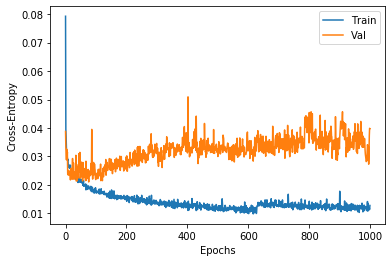

In [24]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Early Stopping

In [26]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

The most relevant arguments are:

* monitor: quantity to be monitored
* patience: number of epochs with no improvement after which training will be stopped

In [27]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Train on 4560 samples, validate on 1140 samples
Epoch 1/100
4560/4560 [==============================] - 1s 262us/step - loss: 0.0871 - accuracy: 0.9792 - val_loss: 0.0364 - val_accuracy: 0.9904
Epoch 2/100
4560/4560 [==============================] - 1s 299us/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0353 - val_accuracy: 0.9868
Epoch 3/100
4560/4560 [==============================] - 1s 224us/step - loss: 0.0358 - accuracy: 0.9871 - val_loss: 0.0345 - val_accuracy: 0.9904
Epoch 4/100
4560/4560 [==============================] - 1s 234us/step - loss: 0.0343 - accuracy: 0.9873 - val_loss: 0.0305 - val_accuracy: 0.9877
Epoch 5/100
4560/4560 [==============================] - 1s 240us/step - loss: 0.0322 - accuracy: 0.9884 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 6/100
4560/4560 [==============================] - 1s 234us/step - loss: 0.0302 - accuracy: 0.9879 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 7/100
4560/4560 [==============================] - 1s 219us/step

In [28]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

2443/2443 [==============================] - 0s 24us/step
Loss 0.027835, Accuracy 0.990585
Loss 0.022286, Accuracy 0.992223
Loss 0.039783, Accuracy 0.992223
Loss 0.023513, Accuracy 0.991813


## L2 Regularization

In [29]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [30]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es,mc]).history

Train on 4560 samples, validate on 1140 samples
Epoch 1/100
4560/4560 [==============================] - 2s 345us/step - loss: 3.8268 - accuracy: 0.7851 - val_loss: 3.2519 - val_accuracy: 0.7982
Epoch 2/100
4560/4560 [==============================] - 1s 265us/step - loss: 3.4640 - accuracy: 0.7851 - val_loss: 3.2519 - val_accuracy: 0.7982
Epoch 3/100
4560/4560 [==============================] - 1s 256us/step - loss: 3.4640 - accuracy: 0.7851 - val_loss: 3.2519 - val_accuracy: 0.7982
Epoch 4/100
4560/4560 [==============================] - 1s 259us/step - loss: 3.4640 - accuracy: 0.7851 - val_loss: 3.2519 - val_accuracy: 0.7982
Epoch 5/100
4560/4560 [==============================] - 1s 255us/step - loss: 3.4640 - accuracy: 0.7851 - val_loss: 3.2519 - val_accuracy: 0.7982
Epoch 6/100
4560/4560 [==============================] - 1s 256us/step - loss: 3.4640 - accuracy: 0.7851 - val_loss: 3.2519 - val_accuracy: 0.7982
Epoch 7/100
4560/4560 [==============================] - 1s 257us/step

In [31]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [32]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es,mc]).history

Train on 4560 samples, validate on 1140 samples
Epoch 1/100
4560/4560 [==============================] - 2s 394us/step - loss: 0.2033 - accuracy: 0.2996 - val_loss: 0.1540 - val_accuracy: 0.0035
Epoch 2/100
4560/4560 [==============================] - 1s 286us/step - loss: 0.1978 - accuracy: 0.0463 - val_loss: 0.1409 - val_accuracy: 0.0053
Epoch 3/100
4560/4560 [==============================] - 1s 284us/step - loss: 0.2183 - accuracy: 0.0162 - val_loss: 0.1544 - val_accuracy: 0.0035
Epoch 4/100
4560/4560 [==============================] - 1s 290us/step - loss: 0.2069 - accuracy: 0.0061 - val_loss: 0.1538 - val_accuracy: 0.0000e+00
Epoch 5/100
4560/4560 [==============================] - 1s 284us/step - loss: 0.2010 - accuracy: 0.0055 - val_loss: 0.3429 - val_accuracy: 0.0088
Epoch 6/100
4560/4560 [==============================] - 1s 287us/step - loss: 0.2120 - accuracy: 0.0059 - val_loss: 0.1538 - val_accuracy: 0.0000e+00
Epoch 7/100
4560/4560 [==============================] - 1s 28

In [33]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

2443/2443 [==============================] - 0s 101us/step


In [34]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.023647, Accuracy 0.992223
Loss 3.424188, Accuracy 0.787556
Loss 0.139118, Accuracy 0.004503


## Hyper-Parameter Tuning

In [35]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [36]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [37]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [38]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

1520/1520 [==============================] - 0s 205us/step


In [39]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.162472 using {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'tanh'}
0.198995 (0.026375) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 128, 'activation': 'relu'}
0.197968 (0.027118) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'tanh'}
0.192295 (0.030733) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 64, 'activation': 'tanh'}
0.162472 (0.019306) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'tanh'}
1.256576 (1.563453) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 64, 'activation': 'relu'}


In [40]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

2443/2443 [==============================] - 0s 154us/step
Loss 0.145192, Accuracy 0.066312
